In [ ]:
import torch
import torch.nn as nn

# **1.Mean Squared Error (MSE)(L2 LOSS)**

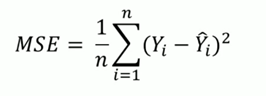

In [ ]:
# 1. Mean Squared Error (MSE) - L2 Loss
def mse(predictions, targets):
    """Calculate MSE from scratch."""
    errors = predictions - targets
    mse = torch.mean(errors ** 2)
    return mse

mse_value = mse(predictions, targets)

In [ ]:
# 1. Mean Squared Error (MSE) Loss (L2 Loss)
mse_loss = nn.MSELoss()

# **2.Mean Absolute Error (MAE)(L1 Loss)**

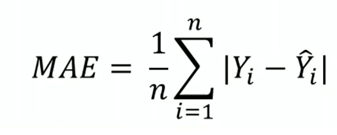

In [ ]:
# 2. Mean Absolute Error (MAE) - Cost Function
def mae(predictions, targets):
    """Calculate MAE cost function from scratch."""
    errors = torch.abs(predictions - targets)
    mae = torch.mean(errors)
    return mae

mae_cost = mae(predictions, targets)

In [ ]:
# 2. Mean Absolute Error (MAE) Loss (L1 Loss)
mae_loss = nn.L1Loss()

# **3.Mean Bias Error (MBE)**

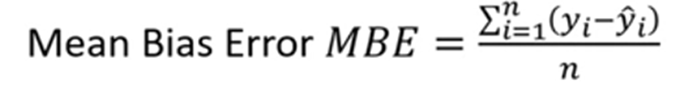

In [ ]:
# 3. Mean Bias Error (MBE) - Cost Function
def mbe(predictions, targets):
    """Calculate MBE cost function from scratch."""
    errors = predictions - targets
    mbe = torch.mean(errors)
    return mbe

mbe_cost = mbe(predictions, targets)

# **4.Root Mean Squared Error (RMSE)**

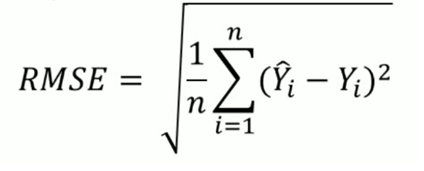

In [ ]:
# 4. Root Mean Squared Error (RMSE) - Cost Function
def rmse(predictions, targets):
    """Calculate RMSE cost function from scratch."""
    errors = predictions - targets
    rmse = torch.sqrt(torch.mean(errors ** 2))
    return rmse

rmse_cost = rmse(predictions, targets)

# **5.Root Mean Squared Logarithmic Error (RMSLE)**

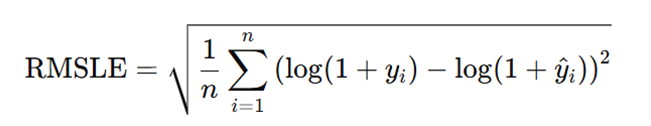

In [ ]:
# 5. Root Mean Squared Logarithmic Error (RMSLE) - Cost Function
def rmsle(predictions, targets):
    """Calculate RMSLE cost function from scratch."""
    log_predictions = torch.log1p(predictions)  # log(1 + predictions)
    log_targets = torch.log1p(targets)  # log(1 + targets)
    squared_log_errors = (log_predictions - log_targets) ** 2
    rmsle = torch.sqrt(torch.mean(squared_log_errors))
    return rmsle

rmsle_cost = rmsle(predictions, targets)

# **6.Huber Loss(Smooth L1 Loss)**

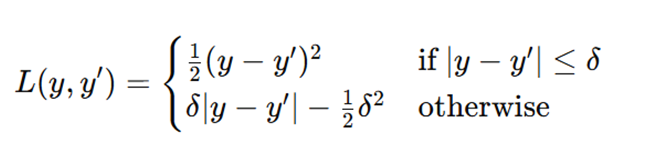

In [ ]:
# 6. Huber Loss (Smooth L1 Loss) - Cost Function
def huber_loss(predictions, targets, delta=1.0):
    """Calculate Huber cost function from scratch."""
    errors = predictions - targets
    condition = torch.abs(errors) < delta
    huber = torch.where(
        condition,
        0.5 * errors ** 2,  # Quadratic for small errors
        delta * (torch.abs(errors) - 0.5 * delta)  # Linear for large errors
    )
    return torch.mean(huber)

huber_cost = huber_loss(predictions, targets)

In [ ]:
# 6. Huber Loss (Smooth L1 Loss)
huber_loss = nn.SmoothL1Loss()

# **7.  Log-Cosh Loss**

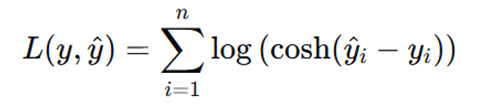

In [ ]:
# 7. Log-Cosh Loss - Cost Function
def log_cosh(predictions, targets):
    """Calculate Log-Cosh cost function from scratch."""
    errors = predictions - targets
    log_cosh = torch.log(torch.cosh(errors))
    return torch.mean(log_cosh)

log_cosh_cost = log_cosh(predictions, targets)

# **B.Classification Loss Functions:**

# **1.Binary Cross-Entropy Loss (BCE)(logloss)**

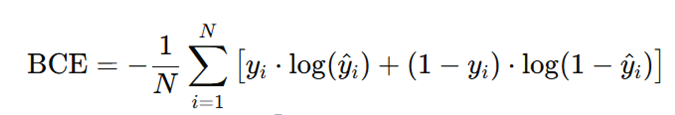

In [ ]:
# 1. Binary Cross-Entropy Loss (BCE) - Cost Function
def binary_cross_entropy(predictions, targets):
    """Calculate BCE cost function from scratch."""
    epsilon = 1e-7  # To avoid log(0)
    predictions = torch.clamp(predictions, epsilon, 1 - epsilon)  # Clamp to avoid log(0) torch.clamp(tensor, min, max)
    bce = -torch.mean(targets * torch.log(predictions) + (1 - targets) * torch.log(1 - predictions))
    return bce

bce_cost = binary_cross_entropy(bce_predictions, bce_targets)

In [ ]:
# Binary Cross-Entropy using nn
bce_loss = nn.BCELoss()  # Reduction is 'mean' by default

In [ ]:
#This version combines a sigmoid activation and binary cross-entropy loss in a numerically stable way.
bce_logits_loss = nn.BCEWithLogitsLoss()

# **2.Categorical Cross-Entropy Loss**

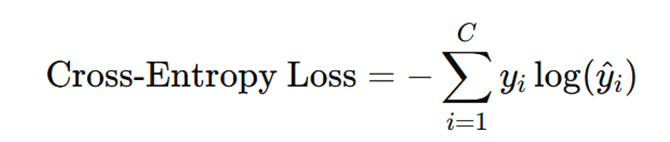

In [ ]:
# 2. Categorical Cross-Entropy Loss - Cost Function
def categorical_cross_entropy(predictions, targets):
    """Calculate Categorical Cross-Entropy cost function from scratch."""
    epsilon = 1e-7  # To avoid log(0)
    predictions = torch.clamp(predictions, epsilon, 1 - epsilon)  # Clamp to avoid log(0)
    n = predictions.shape[0]
    # Select the probabilities corresponding to the target class for each sample
    target_probs = predictions[range(n), targets]
    ce = -torch.mean(torch.log(target_probs))
    return ce

ce_cost = categorical_cross_entropy(ce_predictions, ce_targets)

In [ ]:
#This loss function combines log_softmax and negative log-likelihood, designed for multi-class classification.
cce_loss = nn.CrossEntropyLoss()  # Reduction is 'mean' by default

In [ ]:
# Categorical Cross-Entropy using F
loss = F.cross_entropy(logits, target, reduction='mean')